In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
import sys
sys.path.append("..")

In [4]:
import pandas as pd

SAVE_DIR = "../data"

file_criteo = SAVE_DIR + "/criteo-uplift-v2.1.csv"

df_criteo = pd.read_csv(file_criteo, sep=',')
df_criteo

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979587,26.297764,10.059654,9.006250,4.679882,10.280525,4.115453,-3.282109,4.833815,3.839578,13.190056,5.300375,-0.168679,1,0,0,0
13979588,12.642207,10.679513,8.214383,-1.700105,10.280525,3.013064,-13.955150,6.269026,3.971858,13.190056,5.300375,-0.168679,1,0,0,1
13979589,12.976557,10.059654,8.381868,0.842442,11.029584,4.115453,-8.281971,4.833815,3.779212,23.570168,6.169187,-0.168679,1,0,1,0
13979590,24.805064,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0


In [5]:
random_state=20220720
df_criteo=df_criteo.sample(frac=1.0, random_state=random_state).reset_index(drop=True)

In [6]:
X = df_criteo[['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']].values
X.shape

(13979592, 12)

In [7]:
def scaling(x, min, max):
    return np.where(x < min, 0.0, np.where(x > max, 1.0, (x - min) / (max - min)))

In [ ]:
import numpy as np
X[:, 0] = scaling(X[:, 0], min=np.min(X[:, 0]), max=np.max(X[:, 0]))
X[:, 1] = scaling(X[:, 1], min=np.min(X[:, 1]), max=np.max(X[:, 1]))
X[:, 2] = scaling(X[:, 2], min=np.min(X[:, 2]), max=np.max(X[:, 2]))
X[:, 3] = scaling(X[:, 3], min=np.min(X[:, 3]), max=np.max(X[:, 3]))
X[:, 4] = scaling(X[:, 4], min=np.min(X[:, 4]), max=np.max(X[:, 4]))
X[:, 5] = scaling(X[:, 5], min=np.min(X[:, 5]), max=np.max(X[:, 5]))
X[:, 6] = scaling(X[:, 6], min=np.min(X[:, 6]), max=np.max(X[:, 6]))
X[:, 7] = scaling(X[:, 7], min=np.min(X[:, 7]), max=np.max(X[:, 7]))
X[:, 8] = scaling(X[:, 8], min=np.min(X[:, 8]), max=np.max(X[:, 8]))
X[:, 9] = scaling(X[:, 9], min=np.min(X[:, 9]), max=np.max(X[:, 9]))
X[:, 10] = scaling(X[:, 10], min=np.min(X[:, 10]), max=np.max(X[:, 10]))
X[:, 11] = scaling(X[:, 11], min=np.min(X[:, 11]), max=np.max(X[:, 11]))

In [9]:
T = df_criteo['treatment'].values.reshape(-1, 1)
Y_visit = df_criteo['visit'].values.reshape(-1, 1)
Y_conv = df_criteo['conversion'].values.reshape(-1, 1)

T.shape, Y_visit.shape, Y_conv.shape

((13979592, 1), (13979592, 1), (13979592, 1))

In [10]:
train_len = int(len(X) * 0.7)

X_train = X[:train_len, :]
T_train = T[:train_len, :]
Y_visit_train = Y_visit[:train_len, :]
Y_conv_train = Y_conv[:train_len, :]

X_test = X[train_len:, :]
T_test = T[train_len:, :]
Y_visit_test = Y_visit[train_len:, :]
Y_conv_test = Y_conv[train_len:, :]

train_len, X_train.shape, X_test.shape

(9785714, (9785714, 12), (4193878, 12))

In [11]:
sys.path.append("..")
from model.uplift_model import *

In [12]:
import matplotlib.pyplot as plt

def plot_loss(history, *losses):
    for loss in losses:
        plt.plot(history.history[loss], label=loss)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [15]:
count = 20


trainable_weights
p1_hidden_1/kernel:0
p1_hidden_1/bias:0
p1_hidden_2/kernel:0
p1_hidden_2/bias:0
p1/kernel:0
p1/bias:0
non_trainable_weights
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
p0_raw_features (InputLayer)    [(None, 12)]         0                                            
__________________________________________________________________________________________________
treated_input (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 13)           0           p0_raw_features[0][0]            
                                                                 treated_input[0][0]              
___________________________________________________

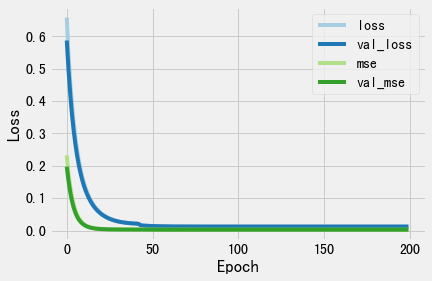

iteration =  2


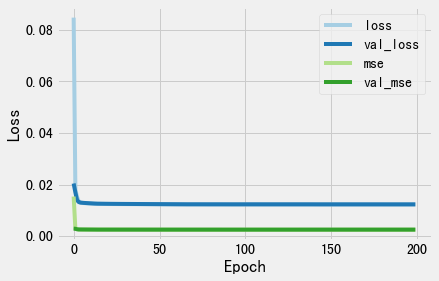

iteration =  3


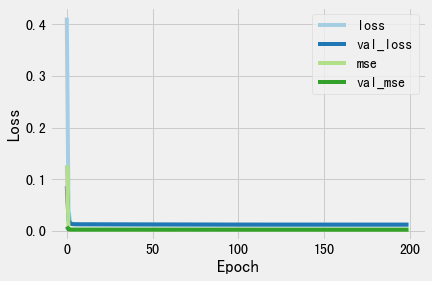

iteration =  4


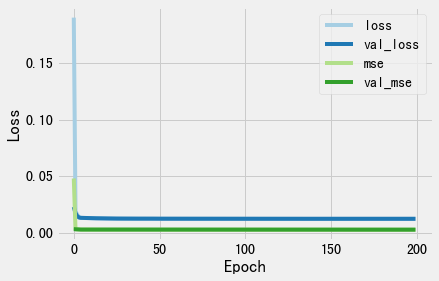

iteration =  5


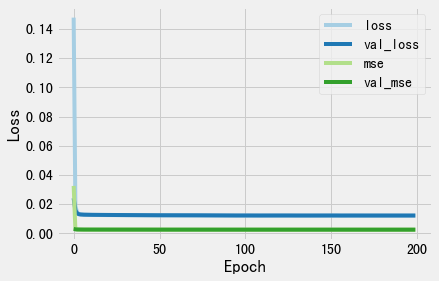

iteration =  6


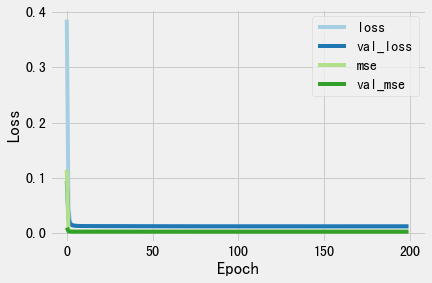

iteration =  7


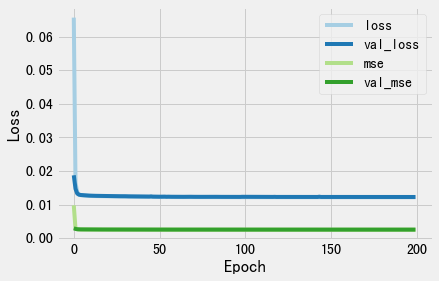

iteration =  8


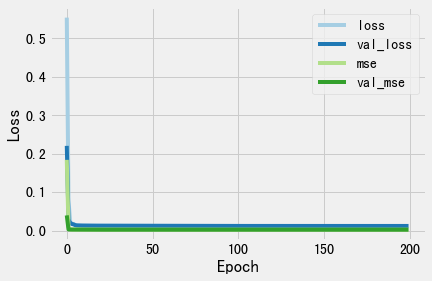

iteration =  9


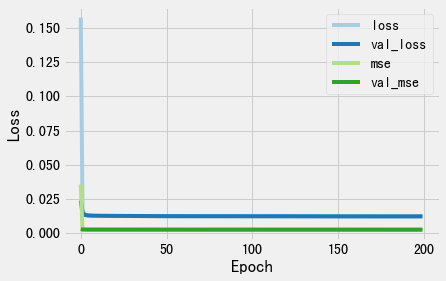

iteration =  10


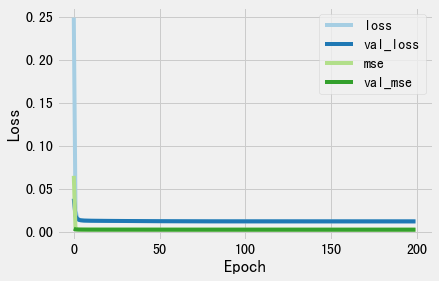

iteration =  11


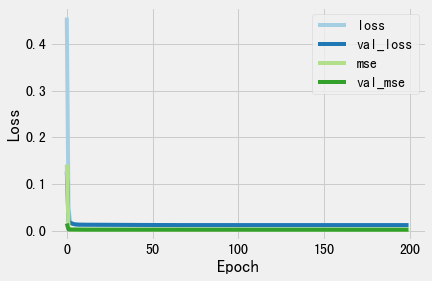

iteration =  12


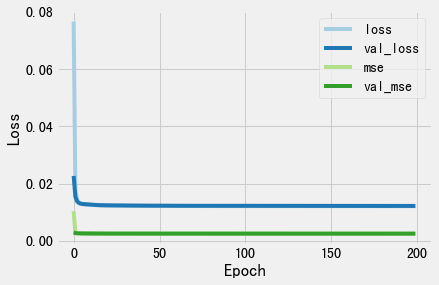

iteration =  13


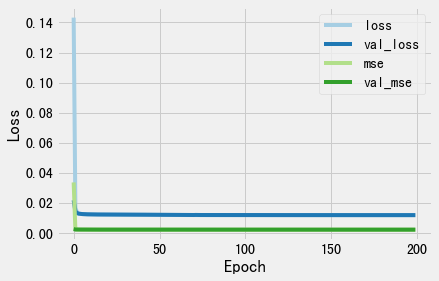

iteration =  14


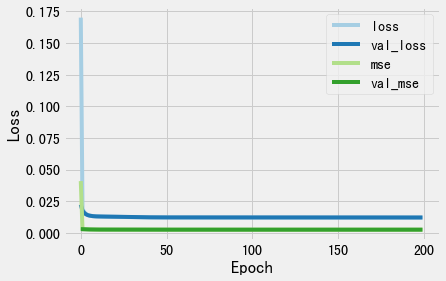

iteration =  15


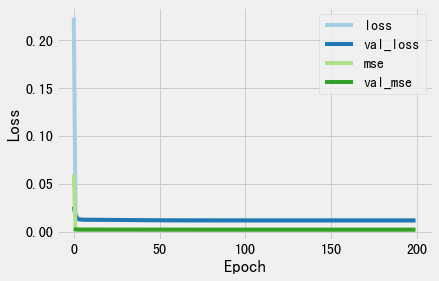

iteration =  16


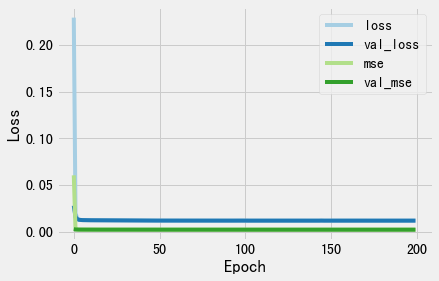

iteration =  17


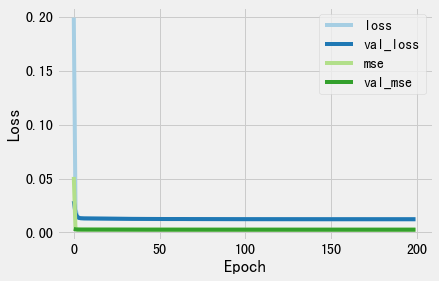

iteration =  18


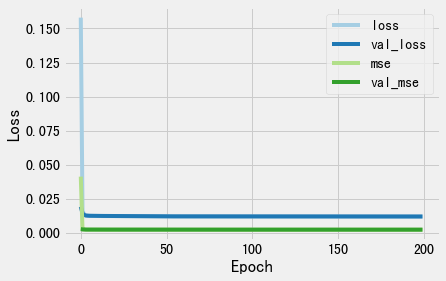

iteration =  19


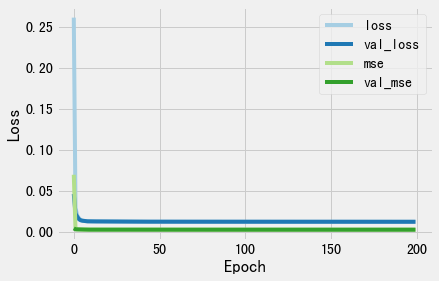

iteration =  20


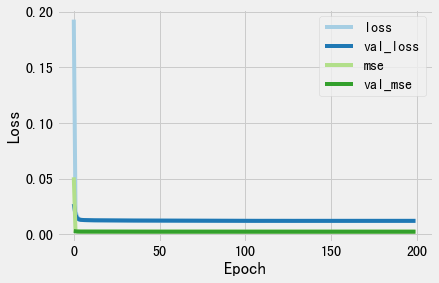

In [16]:
# S LEARNER MODEL
# Y_conv
# 1e-5
import keras
import keras.backend as K
import tensorflow as tf
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from model.uplift_model import *

final_model = get_slearner_criteo_model()
final_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])
#lambda y_true,y_pred: y_pred
print('trainable_weights')
for x in final_model.trainable_weights:
    print(x.name)
print('non_trainable_weights')
for x in final_model.non_trainable_weights:
    print(x.name)
final_model.summary()


for i in range(count):

    print("iteration = ", i + 1)
    
    final_model = get_slearner_criteo_model()
    final_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])
    
    mcp_save = ModelCheckpoint('../model_file/roi/criteo/final_model/direct_ratio_SL/slearner_criteo_conv_model_{}.h5'.format(i+1), save_best_only=True, monitor='val_loss', mode='min', save_weights_only=True)
    history = final_model.fit([X_train, T_train], Y_conv_train, validation_split=0.2, epochs=200, batch_size=32688, shuffle=True, verbose=0, callbacks=[mcp_save])

    plot_loss(history, "loss", "val_loss", "mse", "val_mse")
    
    

iteration =  1
auc0.9564412434194887
mse0.0024823356295711418


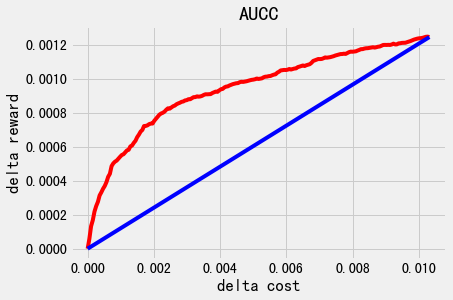

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000058,2027,326,12.782454,16.838903
2,0.000103,0.000132,4406,721,6.999400,8.757069
3,0.000155,0.000167,5782,934,5.741709,7.150370
4,0.000206,0.000219,9151,1496,4.159339,5.005789
...,...,...,...,...,...,...
196,0.010109,0.001240,3296352,581263,0.105564,0.106255
197,0.010161,0.001244,3305749,582784,0.105303,0.106014
198,0.010212,0.001247,3314399,584305,0.105061,0.105771
199,0.010264,0.001248,3328180,586712,0.104672,0.105383


aucc =  0.7557841365778051


iteration =  2
auc0.9546723991525391
mse0.0025093656831225923


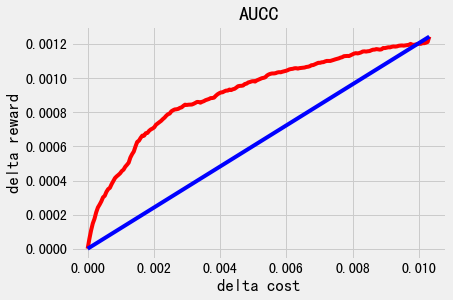

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000058,147996,26075,36.466999,36.149418
2,0.000103,0.000107,203351,36159,26.970589,26.509512
3,0.000155,0.000148,229570,40812,24.033119,23.629763
4,0.000207,0.000176,266657,47497,20.846081,20.461304
...,...,...,...,...,...,...
196,0.010109,0.001207,2824099,496101,2.196054,2.188514
197,0.010161,0.001206,2832393,497444,2.189653,2.182632
198,0.010212,0.001209,2836379,498146,2.186589,2.179569
199,0.010264,0.001214,2848794,500293,2.177094,2.170250


aucc =  0.7330296716901774


iteration =  3
auc0.9546942458554788
mse0.002506993538236256


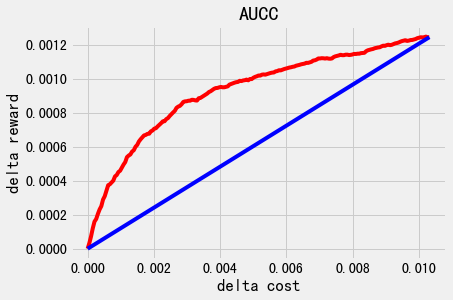

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000033,1064,154,4.855503,4.623477
2,0.000103,0.000073,4591,721,2.864519,2.754470
3,0.000155,0.000120,6215,991,2.565495,2.473365
4,0.000206,0.000160,8143,1351,2.317700,2.219418
...,...,...,...,...,...,...
196,0.010109,0.001243,3441343,607134,0.089978,0.088025
197,0.010161,0.001245,3476138,613241,0.089327,0.087397
198,0.010212,0.001248,3516418,620495,0.088563,0.086639
199,0.010264,0.001244,3532567,623387,0.088251,0.086333


aucc =  0.7454099972153431


iteration =  4
auc0.9573601135828833
mse0.0024837311685319786


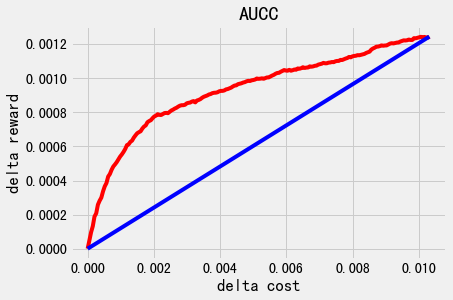

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000048,1374,201,2.348042,2.261324
2,0.000103,0.000096,3545,545,1.845673,1.797158
3,0.000155,0.000132,4768,741,1.710568,1.671375
4,0.000206,0.000189,7264,1187,1.526090,1.483611
...,...,...,...,...,...,...
196,0.010109,0.001238,3400821,599967,0.150405,0.149710
197,0.010161,0.001243,3434215,605881,0.149233,0.148540
198,0.010212,0.001241,3479074,613973,0.147671,0.146952
199,0.010264,0.001238,3487607,615400,0.147375,0.146673


aucc =  0.7470906953343763


iteration =  5
auc0.9566865232574499
mse0.0024894347961536513


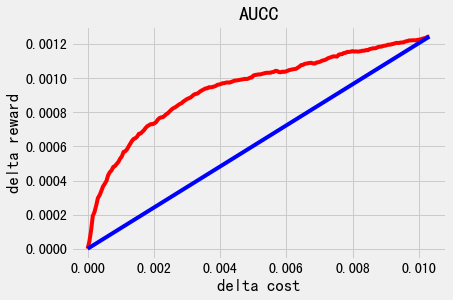

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000043,828,117,4.295316,4.761809
2,0.000103,0.000107,2570,408,3.161570,3.258437
3,0.000155,0.000192,7130,1189,2.224841,2.235779
4,0.000206,0.000215,8471,1425,2.079784,2.082679
...,...,...,...,...,...,...
196,0.010109,0.001233,3551310,627092,0.143422,0.143149
197,0.010161,0.001236,3554076,627516,0.143321,0.143062
198,0.010212,0.001238,3557095,627962,0.143211,0.142970
199,0.010264,0.001244,3561194,628606,0.143059,0.142835


aucc =  0.7566546202113962


iteration =  6
auc0.9567021117991803
mse0.0024851770505275885


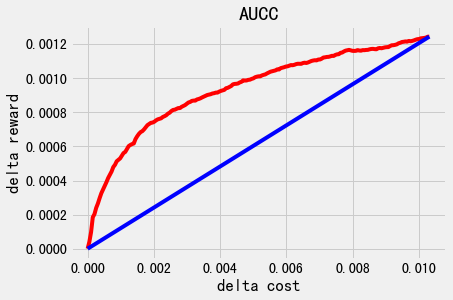

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000041,1756,269,3.354717,3.425420
2,0.000103,0.000098,4324,720,2.551220,2.543246
3,0.000155,0.000185,8739,1471,1.969029,1.956884
4,0.000207,0.000203,11775,2003,1.742880,1.727208
...,...,...,...,...,...,...
196,0.010109,0.001236,3544971,625959,0.139989,0.139646
197,0.010161,0.001237,3548866,626572,0.139850,0.139522
198,0.010212,0.001239,3553343,627302,0.139689,0.139374
199,0.010264,0.001244,3560978,628563,0.139413,0.139117


aucc =  0.752694697885888


iteration =  7
auc0.9565608352588021
mse0.0024850461131816423


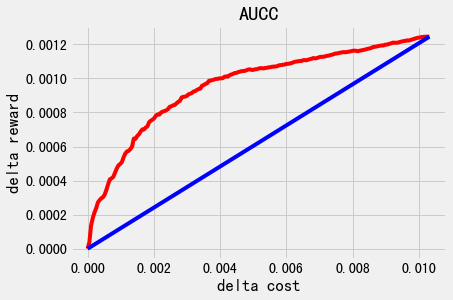

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000038,25757,4577,18.267885,18.380810
2,0.000103,0.000136,71732,12837,8.584994,8.590397
3,0.000155,0.000180,81902,14658,7.775834,7.780617
4,0.000206,0.000213,93674,16706,7.022464,7.045127
...,...,...,...,...,...,...
196,0.010109,0.001243,3159969,556917,0.412061,0.415462
197,0.010161,0.001244,3165520,557841,0.411357,0.414792
198,0.010212,0.001245,3170967,558724,0.410668,0.414152
199,0.010264,0.001245,3177079,559695,0.409896,0.413450


aucc =  0.7685573241472996


iteration =  8
auc0.9566463653025155
mse0.0024993904949154842


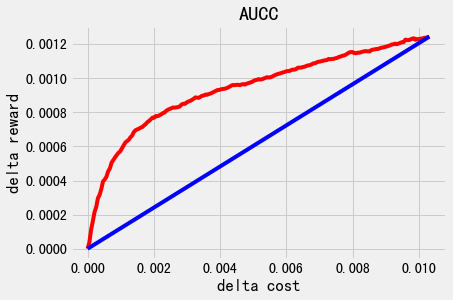

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000038,295740,53871,34.972179,35.912685
2,0.000103,0.000110,420825,76527,25.159662,25.860981
3,0.000155,0.000160,489993,88958,21.798853,22.435890
4,0.000207,0.000214,531775,96530,20.171829,20.761629
...,...,...,...,...,...,...
196,0.010109,0.001234,3483272,614778,3.231846,3.412904
197,0.010161,0.001238,3500316,617691,3.216211,3.396908
198,0.010212,0.001238,3511796,619724,3.205760,3.385828
199,0.010264,0.001242,3522233,621597,3.196314,3.375679


aucc =  0.7536961152962266


iteration =  9
auc0.9564692035734904
mse0.002489355365551167


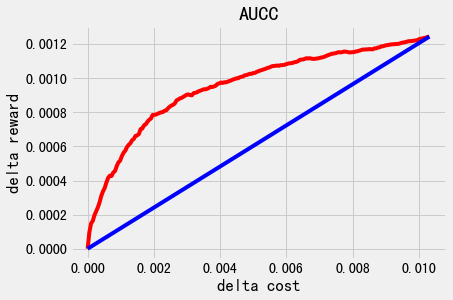

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000097,11743,2053,2.938450,2.992207
2,0.000103,0.000148,19413,3355,2.330263,2.375866
3,0.000155,0.000163,23706,4098,2.107098,2.144157
4,0.000206,0.000197,27095,4655,1.964661,2.003676
...,...,...,...,...,...,...
196,0.010109,0.001235,3548046,626773,0.209308,0.210460
197,0.010161,0.001237,3551487,627260,0.209116,0.210306
198,0.010212,0.001239,3555228,627787,0.208907,0.210138
199,0.010264,0.001243,3560403,628549,0.208616,0.209894


aucc =  0.7659558056448565


iteration =  10
auc0.9573791424514065
mse0.0024845648106771776


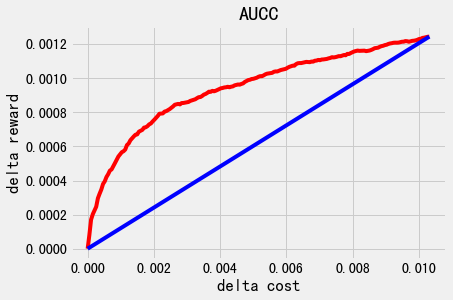

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000081,12435,2145,7.880513,7.344580
2,0.000103,0.000171,19712,3439,5.442394,5.060883
3,0.000155,0.000202,21818,3769,5.022791,4.713692
4,0.000206,0.000225,24933,4300,4.522788,4.257612
...,...,...,...,...,...,...
196,0.010109,0.001237,3488076,615873,0.165379,0.162692
197,0.010161,0.001239,3490569,616209,0.165273,0.162612
198,0.010212,0.001242,3496019,617008,0.165040,0.162422
199,0.010264,0.001244,3501092,617777,0.164820,0.162236


aucc =  0.7566045121907438


iteration =  11
auc0.9542057741556876
mse0.002497343805658009


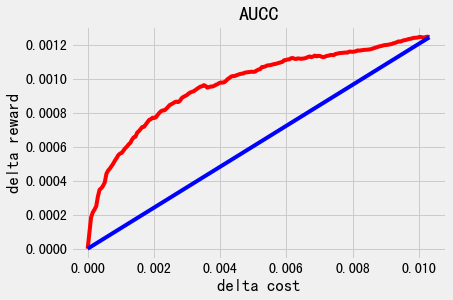

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000093,10594,1946,7.448379,12.278343
2,0.000103,0.000184,39773,7183,2.982460,4.318738
3,0.000155,0.000214,63925,11568,2.210051,3.037671
4,0.000206,0.000230,73197,13121,2.026666,2.768415
...,...,...,...,...,...,...
196,0.010109,0.001244,3507753,619136,0.238915,0.256714
197,0.010161,0.001244,3510915,619624,0.238710,0.256521
198,0.010212,0.001247,3515602,620389,0.238406,0.256218
199,0.010264,0.001249,3519799,621047,0.238133,0.255956


aucc =  0.7771230847321912


iteration =  12
auc0.9576061857454965
mse0.0024862268014002025


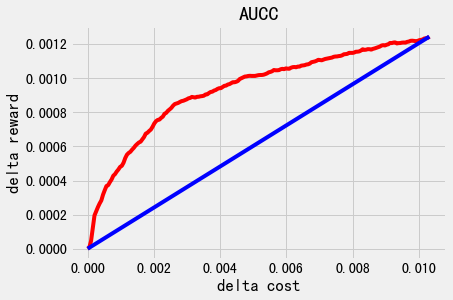

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000008,618314,110363,31.183483,31.175852
2,0.000103,0.000047,625793,111628,30.861534,30.870897
3,0.000155,0.000123,644044,114857,30.067144,30.082741
4,0.000206,0.000195,659462,117535,29.406286,29.438383
...,...,...,...,...,...,...
196,0.010109,0.001227,3422671,603816,5.810602,5.874580
197,0.010161,0.001234,3432211,605374,5.794491,5.859498
198,0.010212,0.001236,3436241,606014,5.787711,5.853324
199,0.010264,0.001237,3442740,607045,5.776809,5.843404


aucc =  0.7488264023189819


iteration =  13
auc0.9573575366929736
mse0.0024848708212973055


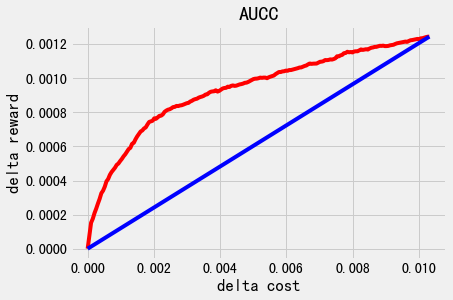

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000077,44454,8043,7.479882,7.545091
2,0.000103,0.000152,58067,10460,6.042576,6.113111
3,0.000155,0.000176,69240,12400,5.243711,5.327891
4,0.000207,0.000209,73138,13099,5.016359,5.095784
...,...,...,...,...,...,...
196,0.010109,0.001236,3495842,617168,0.223156,0.226167
197,0.010161,0.001239,3503626,618432,0.222692,0.225733
198,0.010212,0.001242,3507102,618999,0.222483,0.225538
199,0.010264,0.001244,3510569,619571,0.222275,0.225340


aucc =  0.7500372867280463


iteration =  14
auc0.9575828931397183
mse0.0024815060508917865


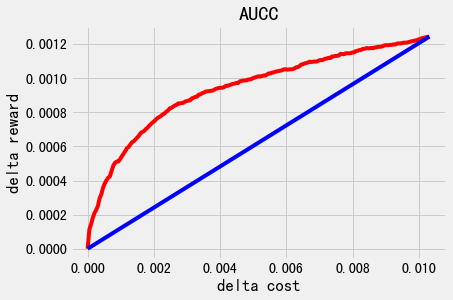

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000113,39529,7047,4.828364,4.848583
2,0.000103,0.000145,46401,8210,4.285964,4.326971
3,0.000155,0.000181,54682,9698,3.798105,3.826471
4,0.000207,0.000210,62684,11117,3.436816,3.461735
...,...,...,...,...,...,...
196,0.010109,0.001237,3414998,602589,0.177004,0.177718
197,0.010161,0.001238,3418752,603172,0.176829,0.177562
198,0.010212,0.001241,3423287,603892,0.176615,0.177369
199,0.010264,0.001243,3427169,604525,0.176430,0.177197


aucc =  0.7545825741224974


iteration =  15
auc0.956456509902789
mse0.002485145301133678


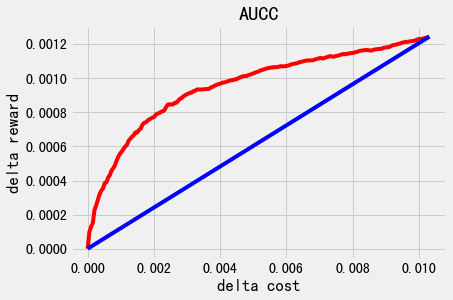

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000097,9993,1749,3.975254,3.919662
2,0.000103,0.000129,13876,2385,3.249639,3.245317
3,0.000155,0.000149,16500,2830,2.920796,2.921488
4,0.000206,0.000227,24937,4238,2.261914,2.273960
...,...,...,...,...,...,...
196,0.010109,0.001233,3544726,626006,0.164612,0.164854
197,0.010161,0.001235,3548638,626600,0.164446,0.164711
198,0.010212,0.001239,3552318,627150,0.164289,0.164578
199,0.010264,0.001241,3555192,627585,0.164166,0.164473


aucc =  0.7665184647181333


iteration =  16
auc0.9573396509943298
mse0.0024839616522526926


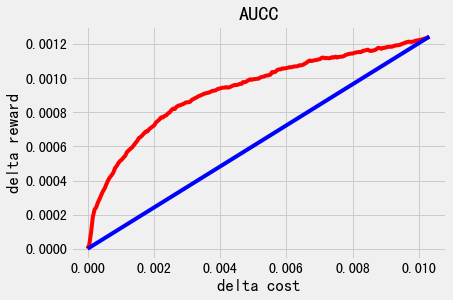

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000026,896,137,8.683691,10.460204
2,0.000103,0.000097,3186,526,4.874691,5.210284
3,0.000155,0.000185,7056,1174,3.271284,3.407341
4,0.000206,0.000228,8947,1488,2.901865,3.010378
...,...,...,...,...,...,...
196,0.010109,0.001229,3517119,621419,0.074910,0.073732
197,0.010161,0.001233,3534968,624442,0.074602,0.073443
198,0.010212,0.001235,3546803,626275,0.074396,0.073266
199,0.010264,0.001239,3558799,628221,0.074184,0.073075


aucc =  0.7480690272539325


iteration =  17
auc0.9562228582212279
mse0.002483307656442658


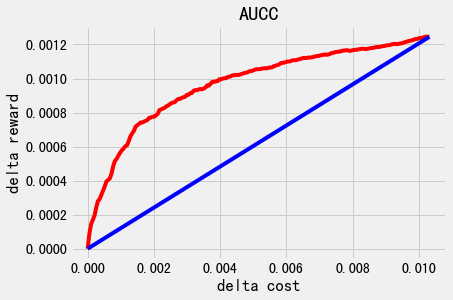

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000088,5656,957,4.824808,4.925653
2,0.000103,0.000144,9826,1634,3.824872,3.908700
3,0.000155,0.000169,12717,2110,3.382706,3.450362
4,0.000207,0.000194,15519,2585,3.057916,3.107585
...,...,...,...,...,...,...
196,0.010109,0.001240,3548948,626775,0.217626,0.218243
197,0.010161,0.001243,3553051,627426,0.217389,0.218030
198,0.010212,0.001246,3557184,628054,0.217150,0.217823
199,0.010264,0.001246,3560540,628532,0.216956,0.217666


aucc =  0.7758168453503903


iteration =  18
auc0.9569107462117883
mse0.00248401696824578


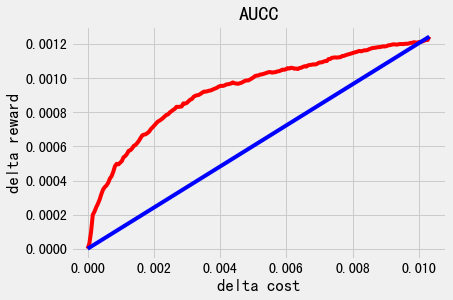

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000031,5868,989,24.520239,25.495770
2,0.000103,0.000100,9982,1699,16.064001,16.515913
3,0.000155,0.000199,19403,3392,9.528553,9.564120
4,0.000206,0.000218,22263,3871,8.553255,8.620235
...,...,...,...,...,...,...
196,0.010109,0.001217,3167006,557113,0.245335,0.246018
197,0.010161,0.001221,3171491,557816,0.245008,0.245725
198,0.010212,0.001225,3178428,558928,0.244502,0.245263
199,0.010264,0.001225,3184327,559910,0.244070,0.244853


aucc =  0.7475847597031692


iteration =  19
auc0.95696537076024
mse0.0024860142445767585


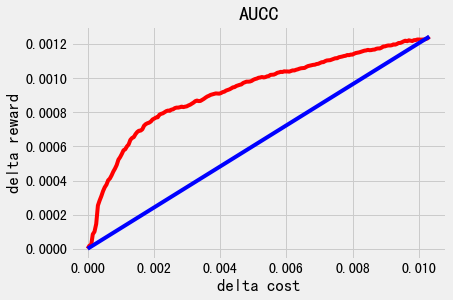

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000018,183754,33302,47.564724,31.925001
2,0.000103,0.000016,349412,63066,29.666883,21.498285
3,0.000155,0.000085,412433,74508,25.729504,18.800032
4,0.000207,0.000100,419574,75762,25.314173,18.510834
...,...,...,...,...,...,...
196,0.010109,0.001228,3520825,621492,3.166625,2.407083
197,0.010161,0.001228,3530803,623207,3.157728,2.400510
198,0.010212,0.001231,3537222,624296,3.152028,2.396352
199,0.010264,0.001235,3551661,626779,3.139272,2.386915


aucc =  0.7450764251102859


iteration =  20
auc0.9564187006360815
mse0.002480561880253831


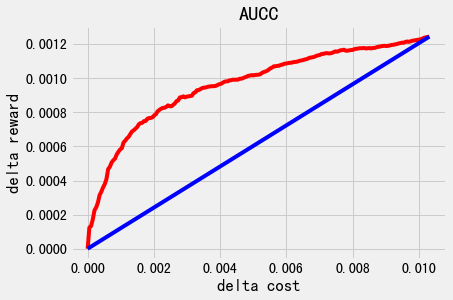

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000124,12810,2246,4.703151,4.923184
2,0.000103,0.000133,15218,2643,4.238330,4.449627
3,0.000155,0.000172,23587,4112,3.253748,3.383893
4,0.000207,0.000225,30564,5313,2.778099,2.883416
...,...,...,...,...,...,...
196,0.010109,0.001234,3543174,625789,0.244059,0.245861
197,0.010161,0.001238,3548108,626555,0.243740,0.245578
198,0.010212,0.001241,3553879,627413,0.243366,0.245261
199,0.010264,0.001243,3558613,628181,0.243059,0.244975


aucc =  0.7730033176945335




In [17]:
import sklearn 
import sklearn.metrics
from metric.Metric import *

direct_ratio_SL_aucc_list = []

for i in range(count):
    
    print("iteration = ", i + 1)
    
    final_model = get_slearner_criteo_model()
    final_model.load_weights('../model_file/roi/criteo/final_model/direct_ratio_SL/slearner_criteo_conv_model_{}.h5'.format(i+1))
    Y_pre = final_model.predict([X_test, T_test])
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_conv_test, Y_pre)
    print("auc"+str(sklearn.metrics.auc(fpr, tpr)))
    print("mse"+str(sklearn.metrics.mean_squared_error(Y_conv_test, Y_pre)))
    
    
    T0 = np.zeros(shape=T_test.shape)
    T1 = np.ones(shape=T_test.shape)

    p0 = final_model.predict([X_test,  T0])
    p1 = final_model.predict([X_test,  T1])

    slearner_conv_pre = p1 - p0
    
    final_model = get_slearner_criteo_model()
    final_model.load_weights('../model_file/uplift/criteo/final_model/slearner/slearner_criteo_model_{}.h5'.format(i+1))
    
    p0 = final_model.predict([X_test,  T0])
    p1 = final_model.predict([X_test,  T1])

    slearner_visit_pre = p1 - p0
    
    
    roi_slearner_pre = slearner_conv_pre / np.where(abs(slearner_visit_pre) < 1e-6, 1e-6, slearner_visit_pre)


    direct_ratio_SL_aucc = get_uplift_model_aucc(t=(T_test > 0.5).flatten(), y_reward=Y_conv_test.flatten(), y_cost=Y_visit_test.flatten(), roi_pred=roi_slearner_pre.flatten(), quantile=200)
    
    direct_ratio_SL_aucc_list.append(direct_ratio_SL_aucc)
    
    print("\n")


In [21]:
direct_ratio_SL_aucc_score_list = np.array([direct_ratio_SL_aucc_list[i][0] for i in range(count)])
print("direct ratio SL aucc mean: ", np.mean(direct_ratio_SL_aucc_score_list))
print("direct ratio SL aucc var: ", np.var(direct_ratio_SL_aucc_score_list))
print("direct ratio SL aucc std: ", np.std(direct_ratio_SL_aucc_score_list))

direct ratio SL aucc mean:  0.7561057881963136
direct ratio SL aucc var:  0.00012867607836007455
direct ratio SL aucc std:  0.011343547873574411


trainable_weights
p1_hidden_1/kernel:0
p1_hidden_1/bias:0
p1/kernel:0
p1/bias:0
non_trainable_weights
Model: "model_61"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
p0_raw_features (InputLayer)    [(None, 12)]         0                                            
__________________________________________________________________________________________________
p1_hidden_1 (Dense)             (None, 8)            104         p0_raw_features[0][0]            
__________________________________________________________________________________________________
treated_input (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
reward_input (InputLayer)       [(None, 1)]          0                                  

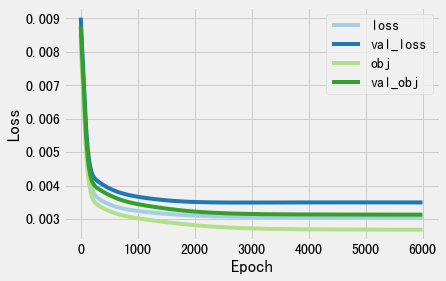

iteration =  2


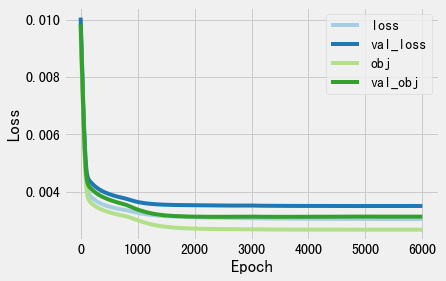

iteration =  3


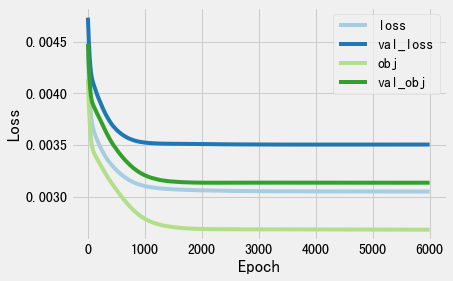

iteration =  4


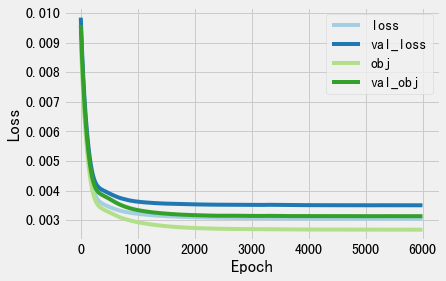

iteration =  5


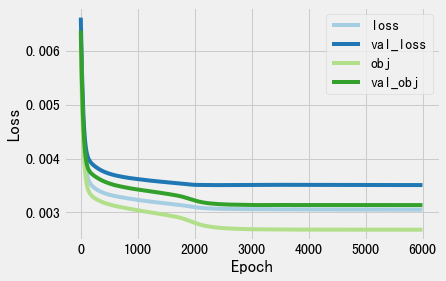

iteration =  6


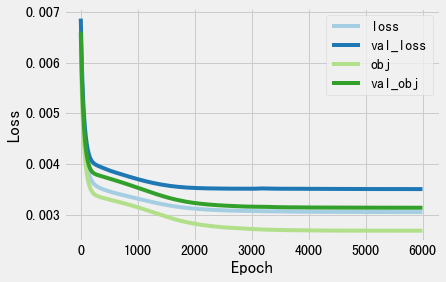

iteration =  7


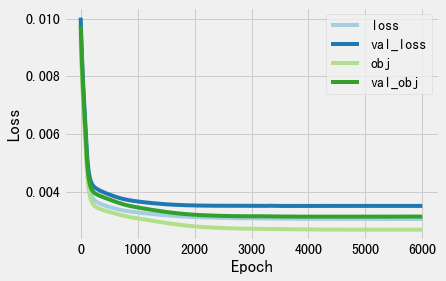

iteration =  8


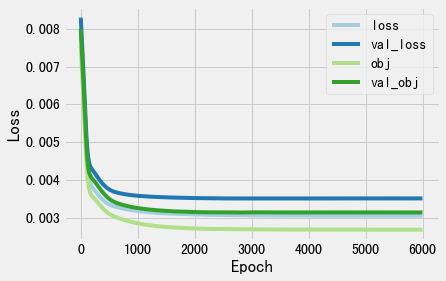

iteration =  9


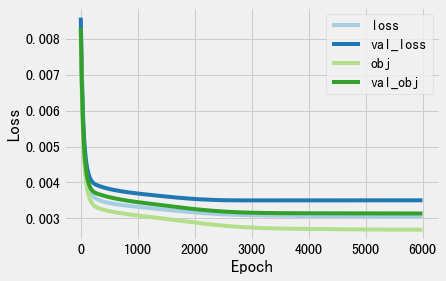

iteration =  10


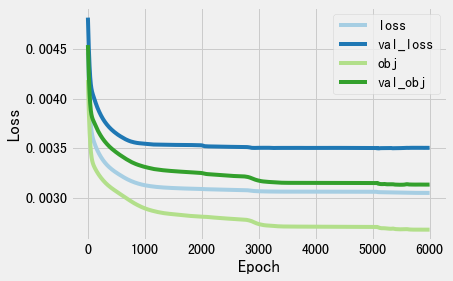

iteration =  11


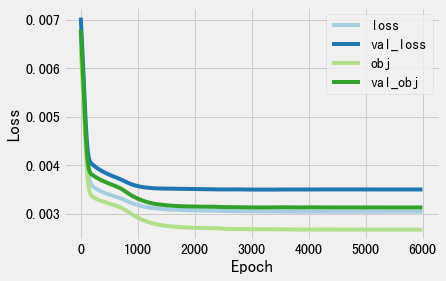

iteration =  12


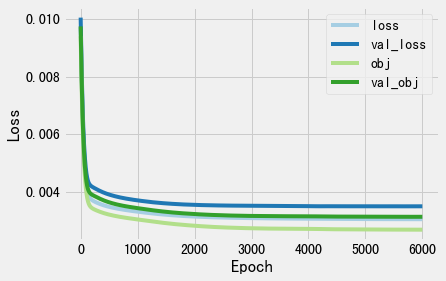

iteration =  13


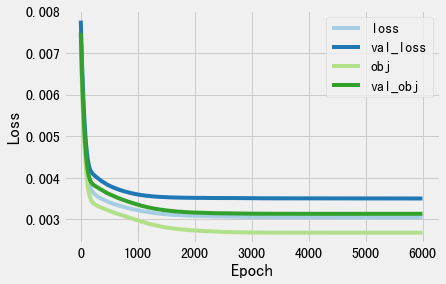

iteration =  14


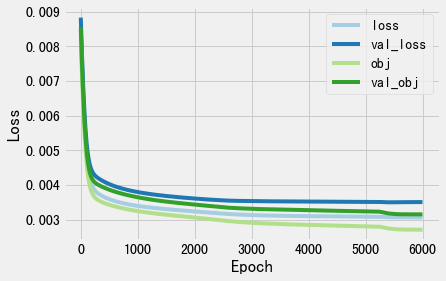

iteration =  15


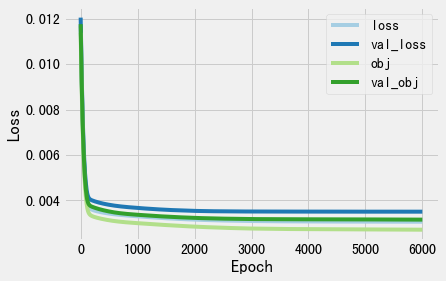

iteration =  16


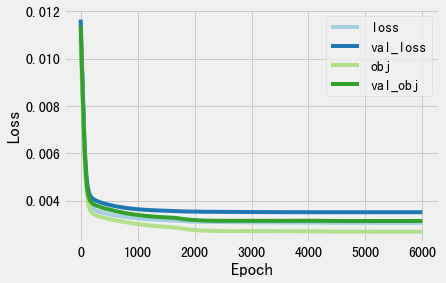

iteration =  17


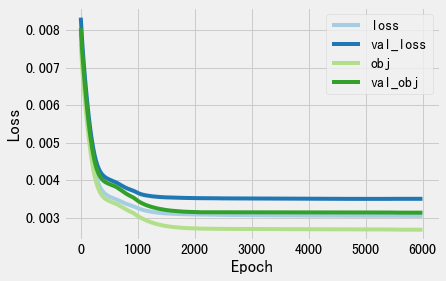

iteration =  18


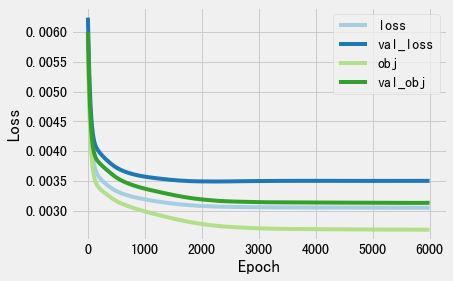

iteration =  19


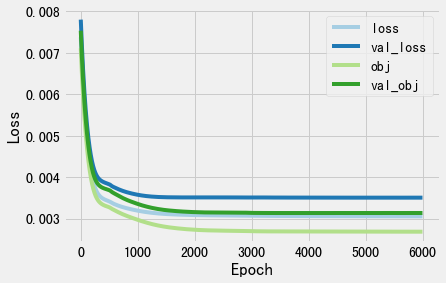

iteration =  20


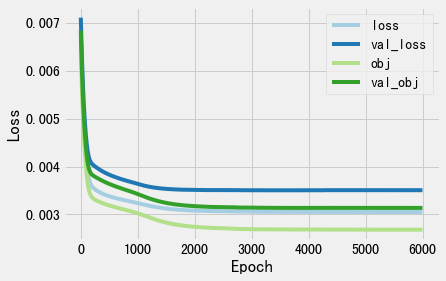

In [22]:
# ROI RANK MODEL
# 2.5e-5
import keras
import keras.backend as K
import tensorflow as tf
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from model.roi_model import *

final_model = get_roi_rank_criteo_model()
final_model.compile(loss=None, optimizer='adam')
#lambda y_true,y_pred: y_pred
print('trainable_weights')
for x in final_model.trainable_weights:
    print(x.name)
print('non_trainable_weights')
for x in final_model.non_trainable_weights:
    print(x.name)
final_model.summary()

for i in range(count):

    print("iteration = ", i + 1)
    
    final_model = get_roi_rank_criteo_model()
    final_model.compile(loss=None, optimizer='adam')

    mcp_save = ModelCheckpoint('../model_file/roi/criteo/final_model/roi_rank/roi_rank_criteo_model_{}.h5'.format(i+1), save_best_only=False, monitor='val_loss', mode='min', save_weights_only=True)
    history = final_model.fit([X_train, T_train, Y_conv_train, Y_visit_train], validation_split=0.2, epochs=6000, batch_size=10000000, shuffle=True, verbose=0, callbacks=[mcp_save])

    plot_loss(history, "loss", "val_loss", "obj", "val_obj")


iteration =  1


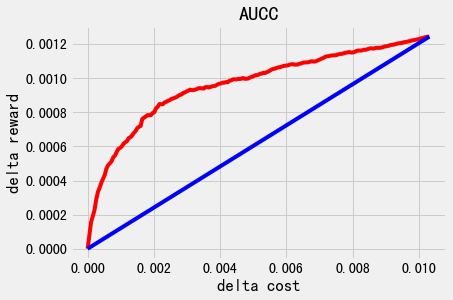

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000077,3203,556,0.867998,0.873088
2,0.000103,0.000157,7807,1322,0.759424,0.764075
3,0.000155,0.000191,10321,1746,0.717031,0.720823
4,0.000206,0.000226,12958,2177,0.681022,0.685253
...,...,...,...,...,...,...
196,0.010109,0.001236,3557273,628258,0.084483,0.084609
197,0.010161,0.001240,3559365,628531,0.084455,0.084589
198,0.010212,0.001242,3561270,628760,0.084429,0.084571
199,0.010264,0.001244,3562799,628933,0.084409,0.084558


aucc =  0.7736305991722782


iteration =  2


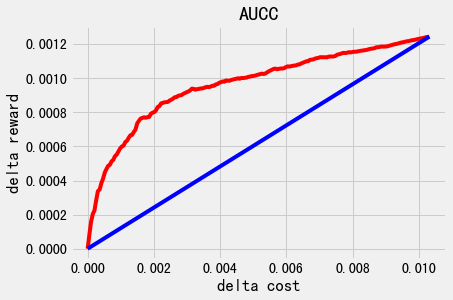

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000083,3354,584,0.871837,0.876276
2,0.000103,0.000159,7691,1299,0.771436,0.776564
3,0.000155,0.000203,11197,1902,0.714376,0.717276
4,0.000206,0.000225,12673,2133,0.694771,0.698782
...,...,...,...,...,...,...
196,0.010109,0.001236,3558385,628435,0.085925,0.086082
197,0.010161,0.001238,3560096,628643,0.085902,0.086065
198,0.010212,0.001242,3561665,628823,0.085879,0.086051
199,0.010264,0.001243,3563203,628994,0.085857,0.086037


aucc =  0.7740444160371134


iteration =  3


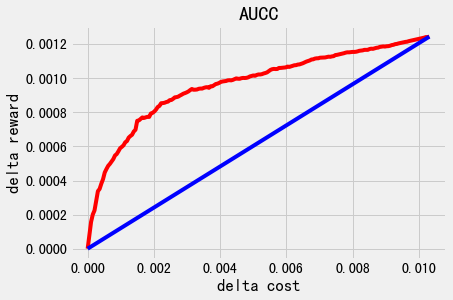

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000081,3296,577,0.873032,0.877062
2,0.000103,0.000157,7713,1304,0.770709,0.775672
3,0.000155,0.000201,10974,1873,0.717352,0.719535
4,0.000206,0.000224,12693,2140,0.694381,0.698114
...,...,...,...,...,...,...
196,0.010109,0.001236,3557769,628350,0.086492,0.086661
197,0.010161,0.001239,3560059,628638,0.086460,0.086637
198,0.010212,0.001242,3561773,628842,0.086435,0.086621
199,0.010264,0.001242,3563159,628991,0.086415,0.086608


aucc =  0.7740986798828233


iteration =  4


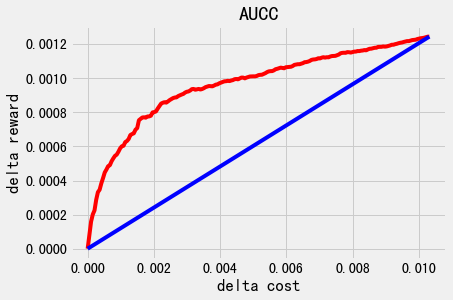

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000078,3232,563,0.873615,0.878211
2,0.000103,0.000159,7671,1296,0.769535,0.774621
3,0.000155,0.000201,11191,1899,0.712077,0.715134
4,0.000207,0.000225,12668,2127,0.692446,0.696833
...,...,...,...,...,...,...
196,0.010109,0.001237,3558802,628498,0.084192,0.084320
197,0.010161,0.001239,3560387,628673,0.084171,0.084307
198,0.010212,0.001241,3561797,628840,0.084152,0.084294
199,0.010264,0.001245,3563303,629010,0.084132,0.084281


aucc =  0.7735367269939194


iteration =  5


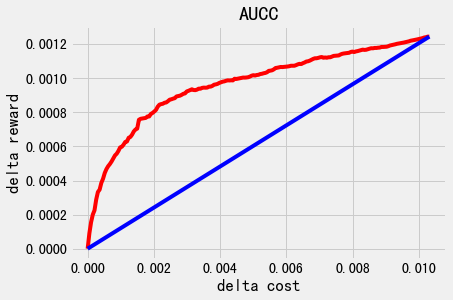

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000090,3891,683,0.850765,0.853756
2,0.000103,0.000155,7639,1297,0.767280,0.771818
3,0.000155,0.000200,11221,1906,0.709546,0.712625
4,0.000206,0.000225,12507,2108,0.692555,0.696535
...,...,...,...,...,...,...
196,0.010109,0.001236,3557045,628239,0.086959,0.087136
197,0.010161,0.001240,3559527,628568,0.086924,0.087109
198,0.010212,0.001241,3561228,628751,0.086899,0.087094
199,0.010264,0.001245,3562739,628927,0.086876,0.087079


aucc =  0.7741013776895264


iteration =  6


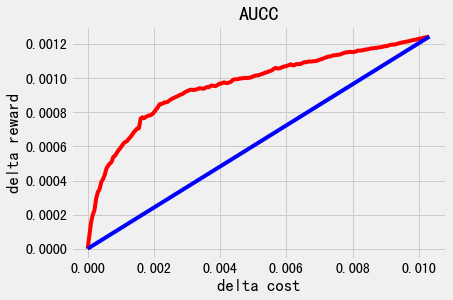

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000079,3302,573,0.870141,0.875033
2,0.000103,0.000156,7815,1324,0.764777,0.769424
3,0.000155,0.000199,10958,1864,0.712923,0.715739
4,0.000206,0.000227,12756,2145,0.688707,0.692906
...,...,...,...,...,...,...
196,0.010109,0.001237,3558539,628441,0.083849,0.083969
197,0.010161,0.001239,3560297,628634,0.083826,0.083955
198,0.010212,0.001241,3561885,628841,0.083805,0.083939
199,0.010264,0.001242,3563417,629019,0.083785,0.083926


aucc =  0.7734687606175077


iteration =  7


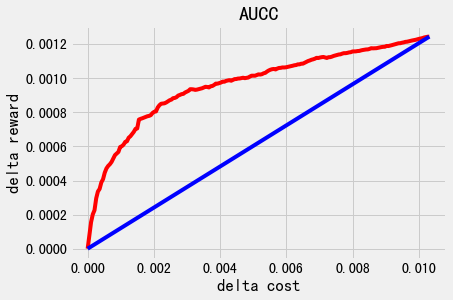

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000079,3285,573,0.873213,0.877534
2,0.000103,0.000156,7728,1311,0.769681,0.774134
3,0.000155,0.000202,10943,1864,0.716617,0.719146
4,0.000207,0.000226,12754,2144,0.692252,0.696464
...,...,...,...,...,...,...
196,0.010109,0.001236,3557290,628262,0.086363,0.086522
197,0.010161,0.001240,3559199,628531,0.086336,0.086500
198,0.010212,0.001242,3561269,628760,0.086306,0.086482
199,0.010264,0.001244,3562844,628942,0.086283,0.086466


aucc =  0.7741816680383273


iteration =  8


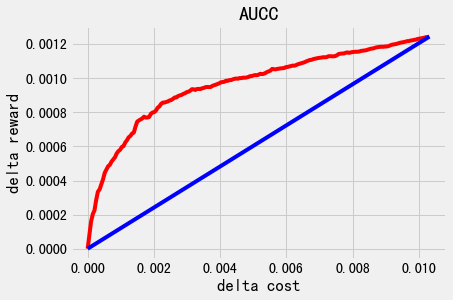

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000082,3308,578,0.873678,0.877829
2,0.000103,0.000160,7700,1300,0.772058,0.777228
3,0.000155,0.000203,11221,1909,0.714989,0.717616
4,0.000207,0.000225,12602,2119,0.696653,0.700820
...,...,...,...,...,...,...
196,0.010109,0.001236,3558326,628425,0.085954,0.086114
197,0.010161,0.001238,3560330,628667,0.085926,0.086094
198,0.010212,0.001242,3562001,628872,0.085902,0.086078
199,0.010264,0.001242,3563297,629011,0.085883,0.086066


aucc =  0.7740268750439636


iteration =  9


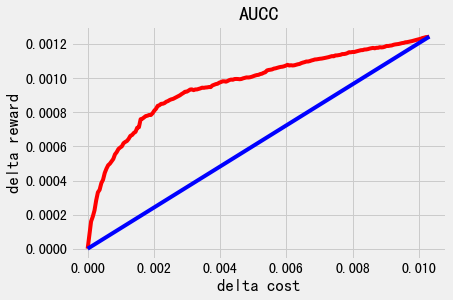

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000081,3295,573,0.868040,0.872849
2,0.000103,0.000160,7843,1329,0.762488,0.767037
3,0.000155,0.000188,10038,1700,0.725350,0.729042
4,0.000206,0.000225,12764,2146,0.687563,0.691746
...,...,...,...,...,...,...
196,0.010109,0.001237,3554212,627742,0.087610,0.087794
197,0.010161,0.001239,3556721,628108,0.087574,0.087764
198,0.010212,0.001242,3559530,628512,0.087532,0.087730
199,0.010264,0.001243,3562277,628865,0.087492,0.087701


aucc =  0.7739829691867924


iteration =  10


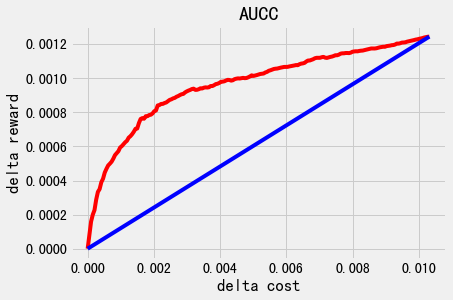

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000078,3271,570,0.869137,0.873527
2,0.000103,0.000159,7707,1308,0.767016,0.771326
3,0.000155,0.000200,10985,1873,0.713450,0.715754
4,0.000206,0.000226,12767,2142,0.689720,0.694189
...,...,...,...,...,...,...
196,0.010109,0.001236,3557568,628316,0.086430,0.086595
197,0.010161,0.001240,3559928,628625,0.086396,0.086570
198,0.010212,0.001242,3561597,628807,0.086371,0.086555
199,0.010264,0.001244,3562888,628944,0.086352,0.086543


aucc =  0.7742302788344932


iteration =  11


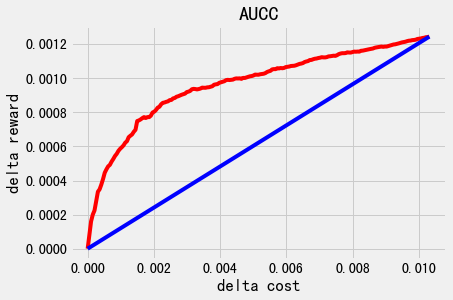

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000082,3283,573,0.871356,0.875644
2,0.000103,0.000160,7730,1308,0.768704,0.773554
3,0.000155,0.000200,11229,1907,0.712382,0.715326
4,0.000206,0.000224,12528,2110,0.695198,0.699145
...,...,...,...,...,...,...
196,0.010109,0.001237,3558560,628469,0.085955,0.086118
197,0.010161,0.001238,3560291,628666,0.085931,0.086102
198,0.010212,0.001241,3561879,628855,0.085908,0.086087
199,0.010264,0.001242,3563294,629006,0.085888,0.086075


aucc =  0.7740574474269744


iteration =  12


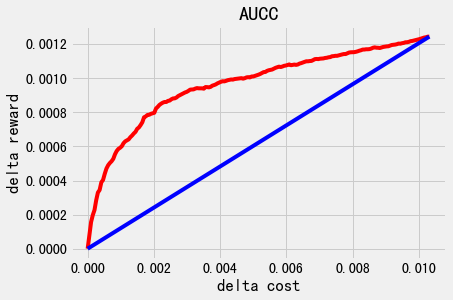

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000081,3345,578,0.846039,0.850439
2,0.000103,0.000157,7946,1349,0.746611,0.750231
3,0.000155,0.000197,11281,1929,0.694777,0.696275
4,0.000207,0.000227,12846,2161,0.674779,0.678473
...,...,...,...,...,...,...
196,0.010109,0.001237,3555981,628053,0.087272,0.087445
197,0.010161,0.001239,3558301,628380,0.087238,0.087418
198,0.010212,0.001241,3560396,628647,0.087206,0.087396
199,0.010264,0.001245,3562270,628855,0.087178,0.087378


aucc =  0.7739485304362326


iteration =  13


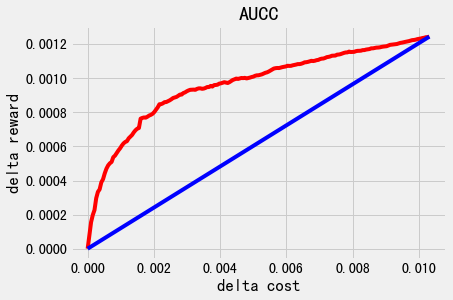

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000078,3275,570,0.870794,0.875429
2,0.000103,0.000156,7746,1312,0.766145,0.770838
3,0.000155,0.000198,10986,1868,0.712734,0.715583
4,0.000207,0.000227,12758,2145,0.688962,0.693162
...,...,...,...,...,...,...
196,0.010109,0.001237,3558524,628447,0.083962,0.084087
197,0.010161,0.001238,3560333,628646,0.083938,0.084072
198,0.010212,0.001241,3561737,628820,0.083919,0.084059
199,0.010264,0.001242,3563430,629020,0.083896,0.084043


aucc =  0.7735857347517275


iteration =  14


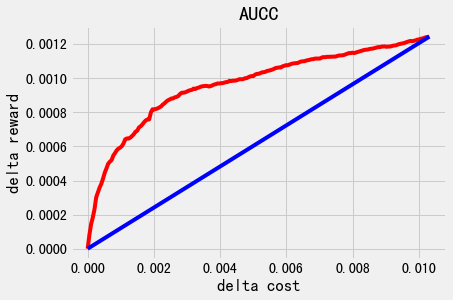

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000080,3246,552,0.820774,0.824866
2,0.000103,0.000143,7145,1208,0.742638,0.746180
3,0.000155,0.000183,10233,1744,0.692800,0.694597
4,0.000206,0.000231,13048,2201,0.656223,0.659070
...,...,...,...,...,...,...
196,0.010109,0.001234,3542982,625727,0.087849,0.088025
197,0.010161,0.001238,3550312,626995,0.087731,0.087909
198,0.010212,0.001241,3556673,628013,0.087626,0.087813
199,0.010264,0.001243,3560816,628614,0.087555,0.087755


aucc =  0.7738909115955293


iteration =  15


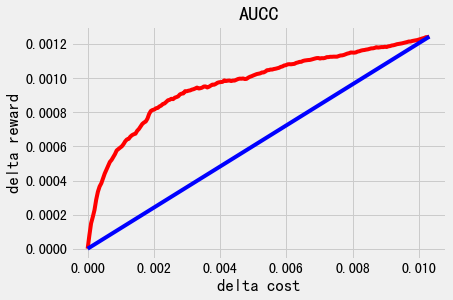

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000079,3234,559,0.809482,0.812970
2,0.000103,0.000149,7594,1294,0.725006,0.727449
3,0.000155,0.000186,10198,1723,0.684565,0.687643
4,0.000206,0.000227,12824,2157,0.651029,0.654292
...,...,...,...,...,...,...
196,0.010109,0.001234,3543656,625852,0.086757,0.086913
197,0.010161,0.001237,3548489,626639,0.086684,0.086846
198,0.010212,0.001242,3556205,627899,0.086566,0.086737
199,0.010264,0.001242,3560347,628526,0.086501,0.086681


aucc =  0.774006186262777


iteration =  16


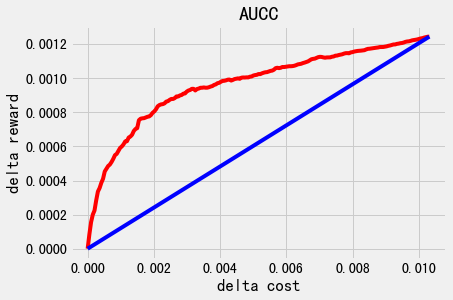

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000084,3892,676,0.847089,0.850836
2,0.000103,0.000156,7704,1304,0.765204,0.769639
3,0.000155,0.000200,11315,1921,0.708302,0.711011
4,0.000207,0.000224,12727,2141,0.690085,0.693949
...,...,...,...,...,...,...
196,0.010109,0.001236,3557229,628259,0.086326,0.086496
197,0.010161,0.001239,3559560,628565,0.086294,0.086472
198,0.010212,0.001242,3561301,628759,0.086269,0.086456
199,0.010264,0.001244,3562814,628935,0.086246,0.086441


aucc =  0.7743132362943863


iteration =  17


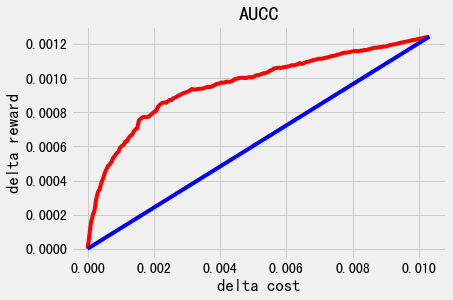

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000079,3284,574,0.872223,0.876425
2,0.000103,0.000158,7735,1308,0.768690,0.773642
3,0.000155,0.000196,10890,1858,0.716715,0.719016
4,0.000206,0.000225,12694,2138,0.692450,0.696375
...,...,...,...,...,...,...
196,0.010109,0.001236,3558584,628456,0.084741,0.084882
197,0.010161,0.001239,3560378,628667,0.084716,0.084866
198,0.010212,0.001241,3561801,628839,0.084697,0.084852
199,0.010264,0.001242,3563360,629011,0.084675,0.084839


aucc =  0.7738966937177472


iteration =  18


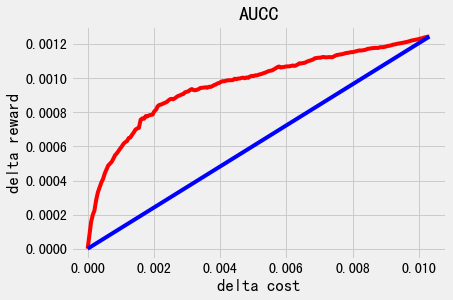

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000080,3307,576,0.860194,0.864171
2,0.000103,0.000157,7745,1317,0.761274,0.765046
3,0.000155,0.000198,11239,1912,0.705816,0.708272
4,0.000206,0.000225,12718,2138,0.686603,0.690623
...,...,...,...,...,...,...
196,0.010109,0.001236,3557253,628261,0.086290,0.086456
197,0.010161,0.001240,3559631,628572,0.086256,0.086431
198,0.010212,0.001242,3561296,628756,0.086231,0.086416
199,0.010264,0.001245,3562815,628931,0.086209,0.086401


aucc =  0.773838976499981


iteration =  19


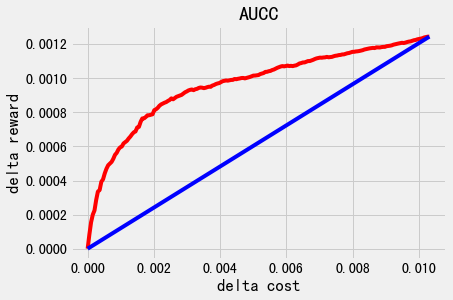

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000083,3341,579,0.862248,0.866745
2,0.000103,0.000155,7763,1316,0.763797,0.768042
3,0.000155,0.000200,11157,1897,0.709511,0.712097
4,0.000206,0.000225,12701,2132,0.689224,0.693502
...,...,...,...,...,...,...
196,0.010109,0.001236,3556095,628078,0.086815,0.086986
197,0.010161,0.001240,3558984,628480,0.086774,0.086954
198,0.010212,0.001242,3560747,628697,0.086749,0.086936
199,0.010264,0.001245,3562559,628888,0.086722,0.086920


aucc =  0.7739911023832526


iteration =  20


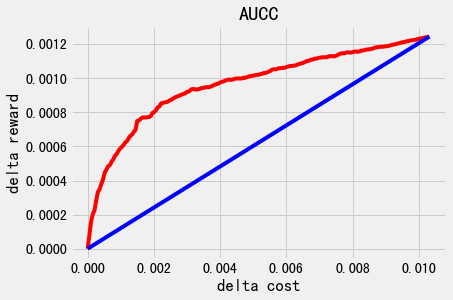

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000081,3338,581,0.870011,0.874412
2,0.000103,0.000159,7706,1302,0.769993,0.774975
3,0.000155,0.000203,11273,1916,0.712639,0.715359
4,0.000207,0.000224,12622,2125,0.694874,0.698791
...,...,...,...,...,...,...
196,0.010109,0.001236,3558495,628446,0.085814,0.085975
197,0.010161,0.001239,3560369,628673,0.085788,0.085957
198,0.010212,0.001242,3561859,628851,0.085767,0.085943
199,0.010264,0.001242,3563265,629003,0.085747,0.085931


aucc =  0.7741030499606079




In [23]:
import sklearn 
import sklearn.metrics
from metric.Metric import *

DRP_aucc_list = []

for i in range(count):
    
    print("iteration = ", i + 1)
    
    final_model = get_roi_rank_criteo_model()
    final_model.load_weights('../model_file/roi/criteo/final_model/roi_rank/roi_rank_criteo_model_{}.h5'.format(i+1))

    roi_rank_pre = final_model.predict([X_test, T_test, Y_conv_test, Y_visit_test])
    
    DRP_aucc = get_uplift_model_aucc(t=(T_test > 0.5).flatten(), y_reward=Y_conv_test.flatten(), y_cost=Y_visit_test.flatten(), roi_pred=roi_rank_pre.flatten(), quantile=200)
    
    DRP_aucc_list.append(DRP_aucc)
    
    print("\n")


In [26]:
DRP_aucc_score_list = np.array([DRP_aucc_list[i][0] for i in range(count)])
print("DRP aucc mean: ", np.mean(DRP_aucc_score_list))
print("DRP aucc var: ", np.var(DRP_aucc_score_list))
print("DRP aucc std: ", np.std(DRP_aucc_score_list))

DRP aucc mean:  0.7739467110412981
DRP aucc var:  5.102257524689473e-08
DRP aucc std:  0.0002258817727194798


In [27]:
import pandas as pd

def get_aucc_cost_curve(aucc_list):
    delta_cost_list_group = np.array([aucc[1] for aucc in aucc_list])
    delta_reward_list_group = np.array([aucc[2] for aucc in aucc_list])
    
    avg_delta_cost_list = np.mean(delta_cost_list_group, axis=0)
    avg_delta_reward_list = np.mean(delta_reward_list_group, axis=0)
    
    df_aucc_cost_curve = pd.DataFrame(avg_delta_cost_list, columns=['delta_cost'])
    df_aucc_cost_curve['delta_reward'] = avg_delta_reward_list
    
    return df_aucc_cost_curve

In [28]:
direct_ratio_avg_aucc_cost_curve = get_aucc_cost_curve(direct_ratio_SL_aucc_list)
print("aucc = ", np.sum(direct_ratio_avg_aucc_cost_curve['delta_reward'].values) / (direct_ratio_avg_aucc_cost_curve['delta_reward'].values[-1] * 201))

aucc =  0.7561057881963135


In [29]:
direct_ratio_avg_aucc_cost_curve.to_csv("../figure/roi/figure_data/criteo/aucc_cost_curve_criteo/direct_ratio_avg_aucc_cost_curve.csv")

In [41]:
DRP_avg_aucc_cost_curve = get_aucc_cost_curve(DRP_aucc_list)
print("aucc = ", np.sum(DRP_avg_aucc_cost_curve['delta_reward'].values) / (DRP_avg_aucc_cost_curve['delta_reward'].values[-1] * 201))

aucc =  0.7739467110412979


In [31]:
DRP_avg_aucc_cost_curve.to_csv("../figure/roi/figure_data/criteo/aucc_cost_curve_criteo/DRP_avg_aucc_cost_curve.csv")

In [32]:
direct_rank_avg_aucc_cost_curve = pd.read_csv("../figure/roi/figure_data/criteo/aucc_cost_curve_criteo/direct_rank_avg_aucc_cost_curve.csv")
print("direct rank aucc = ", np.sum(direct_rank_avg_aucc_cost_curve['delta_reward'].values) / (direct_rank_avg_aucc_cost_curve['delta_reward'].values[-1] * 201))

direct rank aucc =  0.756155648631008


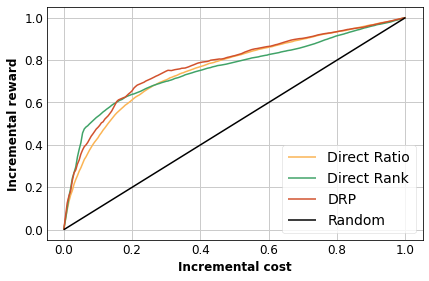

In [42]:
# test AUCC
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

plt.rc('font',family='Times New Roman') 
# plt.figure(facecolor='white')
# plt.axes(facecolor='white')
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('0.8')

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('0.8')

ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('0.8')


ax.spines['right'].set_visible(True)
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('0.8')


x_index = direct_ratio_avg_aucc_cost_curve['delta_cost'].values
y_random = direct_ratio_avg_aucc_cost_curve['delta_reward'].values[-1] / x_index[-1] * x_index

x_normalization = x_index[-1]
y_normalization = direct_ratio_avg_aucc_cost_curve['delta_reward'].values[-1]

plt.plot(x_index / x_normalization, direct_ratio_avg_aucc_cost_curve['delta_reward'].values / y_normalization, color='#FBB454', label='Direct Ratio', linewidth=1.5)
plt.plot(x_index / x_normalization, direct_rank_avg_aucc_cost_curve['delta_reward'].values / y_normalization, color='#40a368', label='Direct Rank', linewidth=1.5)
# plt.plot(x_index, grf_avg_uplift_gain['model'].values, color='#0485d1', label='Causal Forest', linewidth=1.5)
# plt.plot(x_index, DUM_avg_uplift_gain['model'].values, color='#D1512D', label='DUM', linewidth=1.5)
plt.plot(DRP_avg_aucc_cost_curve['delta_cost'].values / x_normalization, DRP_avg_aucc_cost_curve['delta_reward'].values / y_normalization, color='#D1512D', label='DRP', linewidth=1.5)

plt.plot(x_index / x_normalization, y_random / y_normalization, color='#000000', label='Random', linewidth=1.5)

plt.xlabel('Incremental cost', fontsize=12, fontweight='bold')
plt.ylabel('Incremental reward', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# plt.xlim(-3e5, 4.5e6)
# plt.ylim(-0.05, 1.05)


# x_major_locator=MultipleLocator(5e5)
# # y_major_locator=MultipleLocator(0.15)
# y_major_locator=MultipleLocator(0.2)
# ax.xaxis.set_major_locator(x_major_locator)
# ax.yaxis.set_major_locator(y_major_locator)

plt.grid(True)

plt.legend()

# plt.savefig('../figure/roi/avg_aucc_criteo.pdf', format='pdf', bbox_inches = 'tight')

plt.show()